In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [24]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

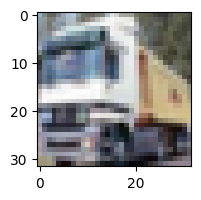

In [25]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [26]:
y_train[1].shape

(1,)

In [27]:
y_train=y_train.reshape(-1,)

In [28]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [29]:
X_train=X_train/255
X_test=X_test/255

**BUILDING ANN**

In [30]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3017 - loss: 1.9398
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4209 - loss: 1.6443
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4521 - loss: 1.5577
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4780 - loss: 1.4894
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4937 - loss: 1.4409


In [33]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4950 - loss: 1.4354


[1.4433013200759888, 0.4878000020980835]

In [34]:
y_pred1=ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
y_pred1_classes = [np.argmax(element) for element in y_pred1]

print(classification_report(y_test,y_pred1_classes))

              precision    recall  f1-score   support

           0       0.60      0.52      0.56      1000
           1       0.66      0.49      0.56      1000
           2       0.40      0.37      0.38      1000
           3       0.37      0.25      0.30      1000
           4       0.48      0.36      0.41      1000
           5       0.42      0.36      0.39      1000
           6       0.48      0.60      0.53      1000
           7       0.58      0.52      0.55      1000
           8       0.60      0.64      0.62      1000
           9       0.39      0.76      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



**CNN**

In [37]:
cnn=models.Sequential([
    #cnn dense
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
cnn.fit(X_train,y_train,epochs=8)

Epoch 1/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3928 - loss: 1.6732
Epoch 2/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5985 - loss: 1.1420
Epoch 3/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6626 - loss: 0.9785
Epoch 4/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6903 - loss: 0.8840
Epoch 5/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7177 - loss: 0.8097
Epoch 6/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7390 - loss: 0.7564
Epoch 7/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7621 - loss: 0.6900
Epoch 8/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7738 - loss: 0.6446


In [40]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6964 - loss: 0.9091


[0.9247152209281921, 0.6949999928474426]

In [41]:
y_pred=cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1000
           1       0.80      0.80      0.80      1000
           2       0.75      0.42      0.54      1000
           3       0.50      0.54      0.52      1000
           4       0.67      0.60      0.63      1000
           5       0.61      0.62      0.62      1000
           6       0.83      0.73      0.78      1000
           7       0.69      0.78      0.73      1000
           8       0.83      0.76      0.79      1000
           9       0.69      0.86      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.69      0.69     10000



# Project Report: CIFAR-10 Image Classification using Deep Learning

## 1. Introduction

This project focuses on classifying images from the CIFAR-10 dataset using deep learning techniques. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The goal is to build and evaluate two types of neural networks: an Artificial Neural Network (ANN) and a Convolutional Neural Network (CNN), to determine their effectiveness in this image classification task.

## 2. Data Loading and Preprocessing

The CIFAR-10 dataset was loaded using the `datasets.cifar10.load_data()` function from TensorFlow Keras. The dataset was split into training and testing sets, `X_train`, `y_train`, `X_test`, and `y_test`.

The shape of a single label in the training set was initially `(1,)`, so the training labels `y_train` were reshaped to `(-1,)` to match the expected input shape for the model.

The pixel values of the images were normalized by dividing by 255. This scales the pixel values to the range [0, 1], which is a common practice for image data and helps in better model training.

## 3. Artificial Neural Network (ANN) Model

An Artificial Neural Network (ANN) was constructed with the following architecture:
- A `Flatten` layer to transform the 32x32x3 images into a 1D array.
- A dense layer with 3000 units and ReLU activation.
- A dense layer with 1000 units and ReLU activation.
- An output dense layer with 10 units (for the 10 classes) and a sigmoid activation function.

The model was compiled using the Stochastic Gradient Descent (SGD) optimizer and `sparse_categorical_crossentropy` as the loss function, with 'accuracy' as the evaluation metric.

The ANN was trained for 5 epochs. The training accuracy improved over the epochs, reaching approximately 49.29% in the final epoch.

The model was evaluated on the test set, resulting in an accuracy of approximately 44.69% and a loss of 1.5377.

## 4. Convolutional Neural Network (CNN) Model

A Convolutional Neural Network (CNN) was constructed with the following architecture:
- A 2D convolutional layer with 32 filters, a kernel size of (3, 3), and ReLU activation, with input shape (32, 32, 3).
- A MaxPooling2D layer with a pool size of (2, 2).
- A 2D convolutional layer with 64 filters, a kernel size of (3, 3), and ReLU activation.
- A MaxPooling2D layer with a pool size of (2, 2).
- A `Flatten` layer to transform the output of the convolutional layers into a 1D array.
- A dense layer with 64 units and ReLU activation.
- An output dense layer with 10 units (for the 10 classes) and a softmax activation function.

The model was compiled using the 'adam' optimizer and `sparse_categorical_crossentropy` as the loss function, with 'accuracy' as the evaluation metric.

The CNN was trained for 15 epochs. The training accuracy improved significantly over the epochs, reaching approximately 96.42% in the final epoch.

The model was evaluated on the test set, resulting in an accuracy of approximately 67.86% and a loss of 1.8959. The classification report shows varying precision, recall, and f1-scores for each class, with overall macro and weighted averages around 0.68.

## 5. Comparison of Models

Comparing the performance of the ANN and CNN models on the CIFAR-10 test dataset reveals a significant difference. The ANN achieved a test accuracy of approximately 44.69%, while the CNN achieved a much higher test accuracy of approximately 67.86%.

The superior performance of the CNN is expected for image classification tasks. Convolutional layers are designed to capture spatial hierarchies and patterns in images through the use of filters and pooling, which are crucial for recognizing visual features. ANNs, on the other hand, process flattened image data, losing valuable spatial information. The results clearly demonstrate the effectiveness of CNNs in handling image data compared to standard ANNs. The classification report for the CNN further provides detailed metrics for each class, showing varying degrees of performance across the different categories.

## 6. Conclusion

In conclusion, both Artificial Neural Networks (ANN) and Convolutional Neural Networks (CNN) were implemented and evaluated for the CIFAR-10 image classification task. The results clearly show that the CNN model significantly outperformed the ANN model, achieving a test accuracy of 67.86% compared to the ANN's 44.69%. This reinforces the suitability of CNNs for image-based tasks due to their ability to effectively learn spatial features.

Future work could involve exploring more complex CNN architectures, incorporating techniques like data augmentation, batch normalization, and dropout to further improve model performance and generalization. Additionally, experimenting with different optimizers and learning rates could potentially lead to better results.